# Cena em Markdown
Descrição da cena

In [1]:
from datetime import datetime as dt
import quandl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('ggplot')

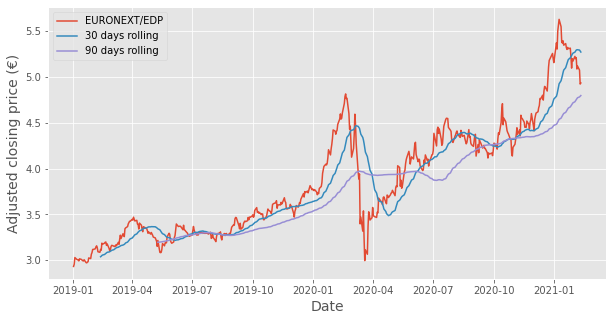

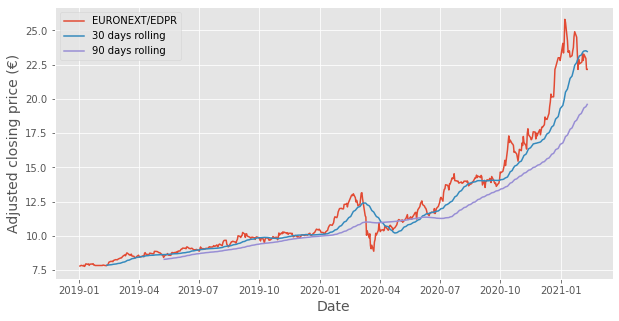

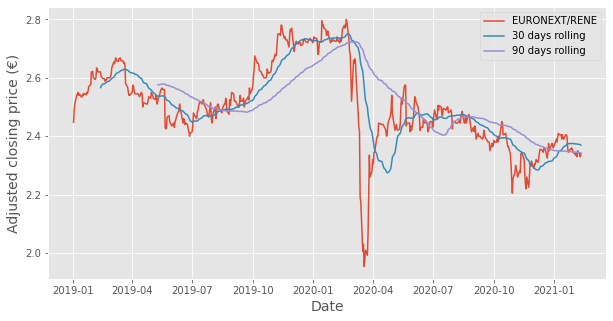

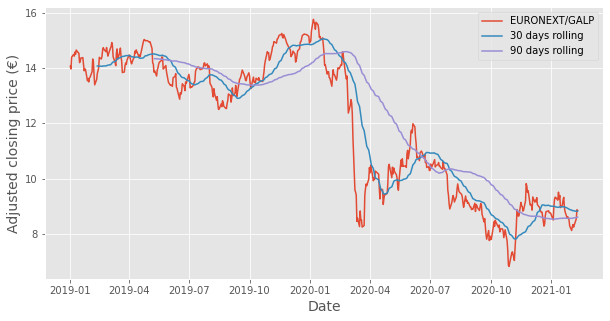

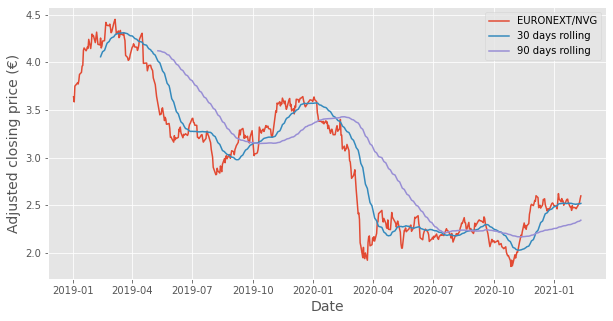

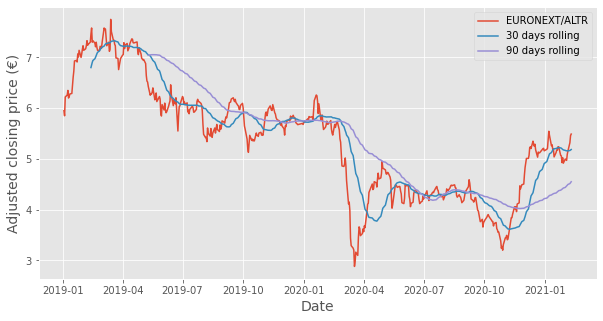

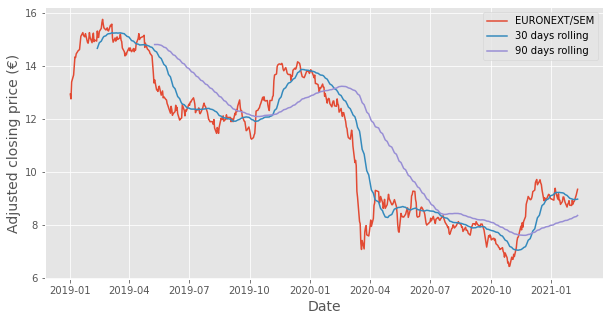

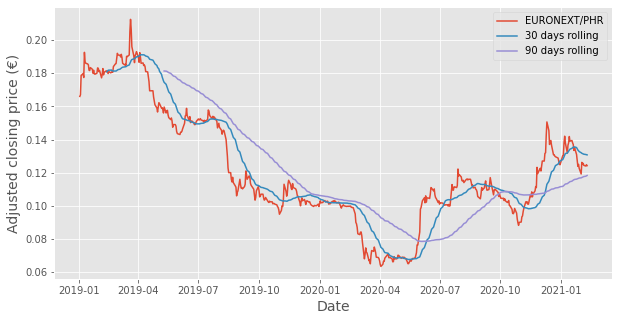

In [12]:
stocks = ["EURONEXT/EDP", "EURONEXT/EDPR", "EURONEXT/RENE", "EURONEXT/GALP", 
          "EURONEXT/NVG", "EURONEXT/ALTR", "EURONEXT/SEM", "EURONEXT/PHR"]

start_date = "2019-01-01"
end_date = dt.today()

quandl.ApiConfig.api_key = 'HPsc-Kd166zTR2Bdztjz'

for stock in stocks:
    df = quandl.get(stock, start_date=start_date, end_date=end_date)
    close = df["Last"]
    short_rolling = close.rolling(window=30).mean()
    long_rolling = close.rolling(window=90).mean()
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(close.index, close, label=stock)
    ax.plot(short_rolling.index, short_rolling, label='30 days rolling')
    ax.plot(long_rolling.index, long_rolling, label='90 days rolling')
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Adjusted closing price (€)", fontsize=14)
    ax.legend()